In [1]:
import pandas as pd

import numpy as np

from sklearn.preprocessing import robust_scale, normalize

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import pickle as pkl

font= matplotlib.font_manager.FontProperties(fname= 'C:\Windows\\Fonts\\batang.ttc').get_name()
matplotlib.rc('font', family=font)  

### 수치로 표현할 수 있는 데이터를 중심으로 탐색적 데이터 분석을 실시하였음.

사용자 별로 Feature를 정렬하였으며, 이 때 중심적으로 확인한 Feature는 다음과 같음:

영수증의 개수, 업종의 개수, 소품목의 개수, 소비한 점포의 개수, L-Point를 활용한 달 수, 총 소비 금액

In [2]:
df= pd.read_table('./Pre_processed_data/merged_dataframe_shopping.csv', delimiter= ',', encoding='euc-kr')

In [3]:
df.head()

,Unnamed: 0,ID,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,BUY_AM,BUY_CT,AGE_PRD,HOM_PST_NO,...,PD_M_NM,PD_H_NM,IS_MALE,IS_FEMALE,YEAR,MONTH,DAY,HOUR,PRVIN,DESTRICT
0,0,4008,2108,A01,215,2,59600,2,50,056,...,캐주얼,여성의류,0,1,2015,2,16,13,서울특별시,송파구
1,1,6379,2109,A01,75,29,35000,1,40,480,...,건강식품,식품,1,0,2015,2,13,11,부산광역시,해운대구
2,2,6379,2109,A01,149,4,85000,1,40,480,...,화장품,잡화,1,0,2015,1,15,10,부산광역시,해운대구
3,3,8002,2110,A01,138,10,25000,1,30,300,...,섬유잡화,잡화,0,1,2015,12,20,10,세종특별자치시,NaN
4,4,8002,2110,A01,138,10,21000,1,30,300,...,섬유잡화,잡화,0,1,2015,12,20,10,세종특별자치시,NaN


In [4]:
df.drop('Unnamed: 0', axis= 1, inplace= True)

In [5]:
df['YEARMONTH']= 100*df['YEAR']+df['MONTH']

In [6]:
df['DAYHOUR']= 100*df['DAY']+ df['HOUR']

In [7]:
df.drop(['YEAR', 'MONTH', 'DAY', 'HOUR'], axis= 1, inplace= True)

In [8]:
agg_func= {'RCT_NO': lambda x: x.nunique(), 'BIZ_UNIT': lambda x: x.nunique(), 'PD_S_C': lambda x: x.nunique(), 'BR_C': lambda x:x.nunique(), 'YEARMONTH': lambda x: x.nunique(), 'BUY_AM': 'sum'}

In [9]:
df_restructured= df.groupby(['ID']).agg(agg_func)

In [10]:
df_restructured

,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,YEARMONTH,BUY_AM
ID,,,,,,
1,43,2,33,3,9,3695930
2,55,2,111,3,13,1979142
3,32,3,61,7,10,2272884
4,122,3,136,7,12,7970116
6,280,4,253,9,13,6458914
7,50,2,28,3,11,2650880
8,59,2,122,5,11,7635203
9,72,2,71,5,12,11241966
10,11,1,8,1,6,351800


### 소비액을 기준으로 사용자를 정렬하였음.

이 때 상위 소비자는 150개 전후의 품목을 소비하면서 L-Point를 활용하고 있었음. 또한 대부분이 11~13개월 동안 L-Point를 사용한 사용자였으며, 업종이나 점포 역시 다양하게 활용하는 것으로 나타났음.

In [11]:
df_restructured.sort_values(by= ['BUY_AM'], ascending= False)

,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,YEARMONTH,BUY_AM
ID,,,,,,
13087,175,3,145,25,12,1223499836
7278,215,3,102,7,12,342051200
12557,190,5,184,31,12,326478568
2807,110,4,146,17,12,323160907
2863,80,2,88,8,12,322098622
9038,262,5,200,12,12,310334084
6663,173,3,67,10,12,284605677
2363,116,3,151,8,12,273316980
3020,315,5,250,19,12,265696983


In [12]:
df_restructured.drop(13087, axis= 0, inplace= True)

# 너무 사용액이 큰 이상점 13087 사용자를 삭제하였음.

### 영수증의 개수를 기준으로 사용자를 정렬하였음.

이 때 상위 소비자는 400~1200여 번 소비하면서 150~500여 종류의 품목을 소비하는 것으로 나타났음. L-Point를 사용한 달 수도 일반적으로 12개월 이상으로 나타났지만, 소비액은 일반적으로 5천만 원 이하로 나타나 소비액 기준 상위 소비자와 다를 것으로 예상됨.

In [13]:
df_restructured.sort_values(by= ['RCT_NO'], ascending= False)

,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,YEARMONTH,BUY_AM
ID,,,,,,
16742,1192,1,260,1,12,13092690
12178,919,4,401,7,12,23057858
4500,782,3,203,4,12,3618460
5264,682,4,436,18,13,16251166
327,629,3,334,7,13,26657802
1951,619,4,277,16,13,9370727
1715,587,4,446,14,13,31154736
4505,576,4,512,25,12,47692563
9677,576,4,600,7,13,21005422


In [14]:
df_restructured.drop([16742, 12178], axis= 0, inplace= True)

# 너무 영수증의 개수가 큰 이상점 16742, 12178 사용자를 삭제하였음.

In [15]:
sns.set()

In [16]:
sns.set_context("paper", font_scale= 1.5, rc={"lines.linewidth": 1.2, })

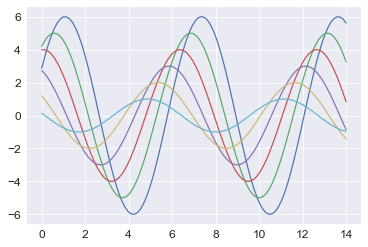

In [17]:
x = np.linspace(0, 14, 100)
for i in range(1, 7):
    plt.plot(x, np.sin(x + i * .5) * (7 - i))
plt.show()

In [18]:
df_toplt= pd.DataFrame(robust_scale(df_restructured[['RCT_NO', 'PD_S_C', 'BR_C', 'BUY_AM']]), columns= ['RCT_NO', 'PD_S_C', 'BR_C', 'BUY_AM'])

In [19]:
logmin, logmax= np.log(df_restructured['BUY_AM'].min()), np.log(df_restructured['BUY_AM'].max())

In [20]:
newbins= np.logspace(logmin, logmax, 50)

### 전체적인 변수들 간의 상관관계를 확인하였음.

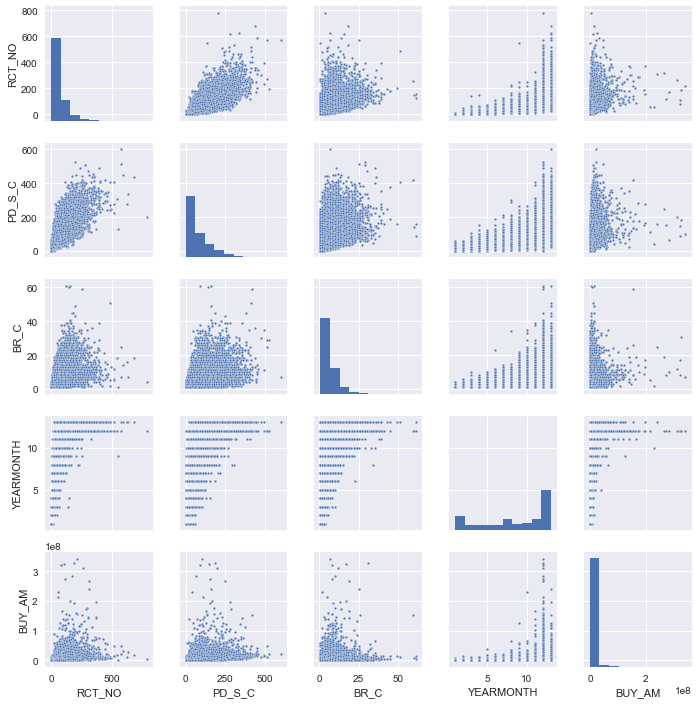

In [21]:
sns.set()
sns.pairplot(df_restructured.drop('BIZ_UNIT', axis= 1), kind= 'scatter', size= 2, plot_kws= {'s': 7})
plt.show()

### 영수증의 개수를 중심으로 시각화를 진행하였음.

이 때 다른 Feature에 비해 Scale이 매우 큰 소비액의 경우만 Scaling을 실시하였으며, Feature의 종류에 따라 다른 그래프를 활용하였음.

In [22]:
grp= sns.distplot(df_restructured['RCT_NO'], bins= 50, kde= False)

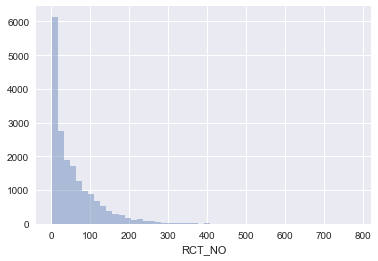

In [23]:
plt.show()

In [24]:
grp= sns.boxplot(x= 'BIZ_UNIT', y= 'RCT_NO', data= df_restructured)

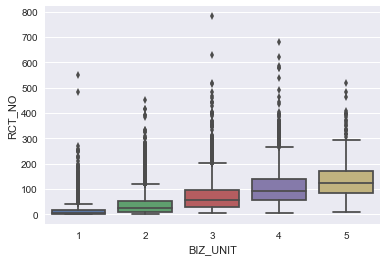

In [25]:
plt.show()

In [26]:
grp= sns.boxplot(x= 'BIZ_UNIT', y= 'RCT_NO', data= df_restructured, showfliers= False)

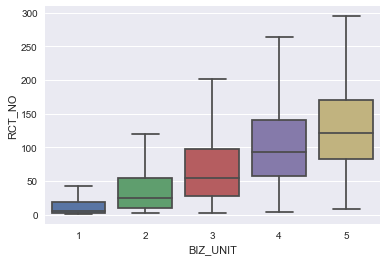

In [27]:
plt.show()

In [28]:
grp= sns.jointplot(df_toplt['RCT_NO'], df_toplt['PD_S_C'], size= 8)

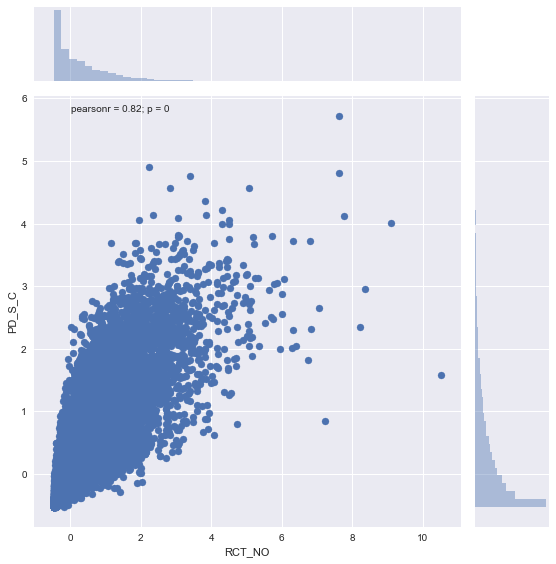

In [29]:
plt.show()

In [30]:
grp= sns.jointplot(df_restructured['RCT_NO'], df_restructured['BR_C'], size= 8)

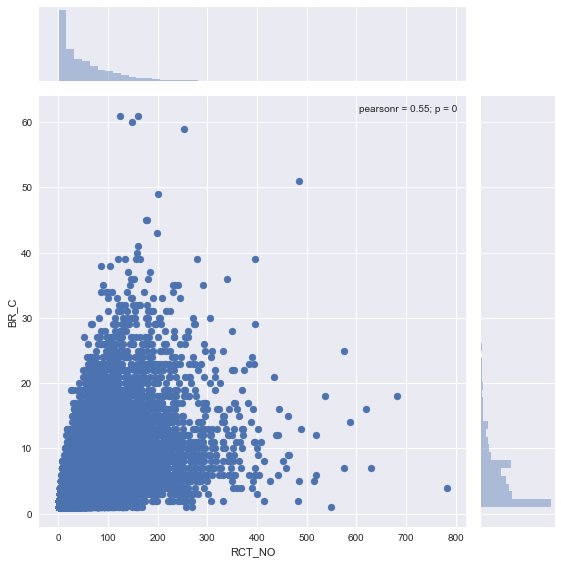

In [31]:
plt.show()

In [32]:
grp= sns.boxplot(x= 'YEARMONTH', y= 'RCT_NO', data= df_restructured, width= 0.3)

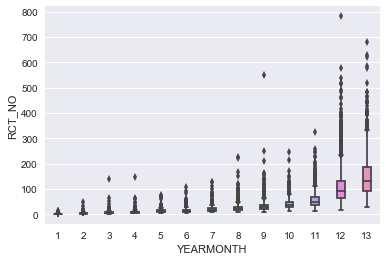

In [33]:
plt.show()

In [34]:
grp= sns.boxplot(x= 'YEARMONTH', y= 'RCT_NO', data= df_restructured, showfliers= False, width= 0.3)

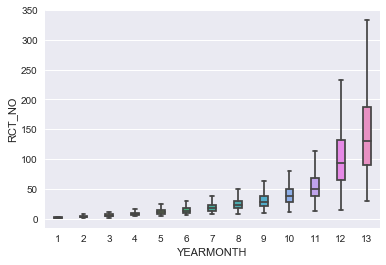

In [35]:
plt.show()

In [36]:
grp= sns.jointplot(df_toplt['RCT_NO'], df_toplt['BUY_AM'], size= 8)

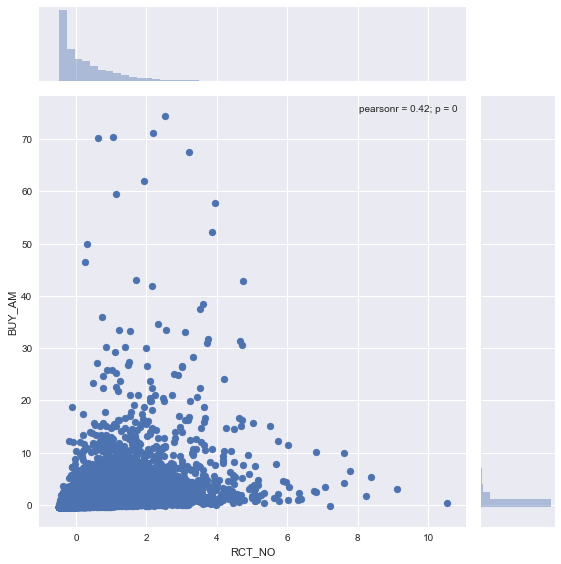

In [37]:
plt.show()

### 소품목 종류의 개수를 중심으로 시각화를 진행하였음.


In [38]:
grp= sns.distplot(df_restructured['PD_S_C'], bins= 50, kde= False)

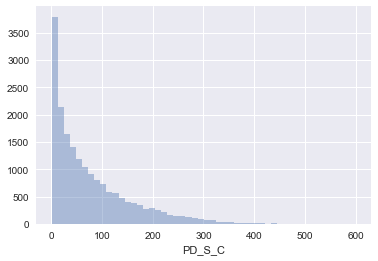

In [39]:
plt.show()

In [40]:
grp= sns.boxplot(x= 'BIZ_UNIT', y= 'PD_S_C', data= df_restructured)

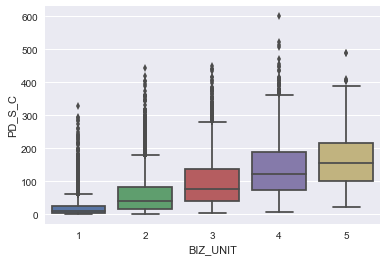

In [41]:
plt.show()

In [42]:
grp= sns.boxplot(x= 'BIZ_UNIT', y= 'PD_S_C', data= df_restructured, showfliers= False)

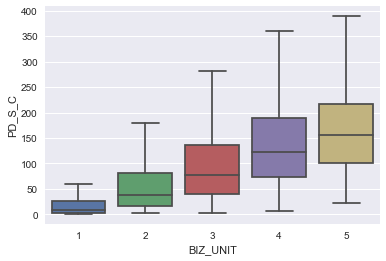

In [43]:
plt.show()

In [44]:
grp= sns.jointplot(df_restructured['PD_S_C'], df_restructured['BR_C'], size= 8)

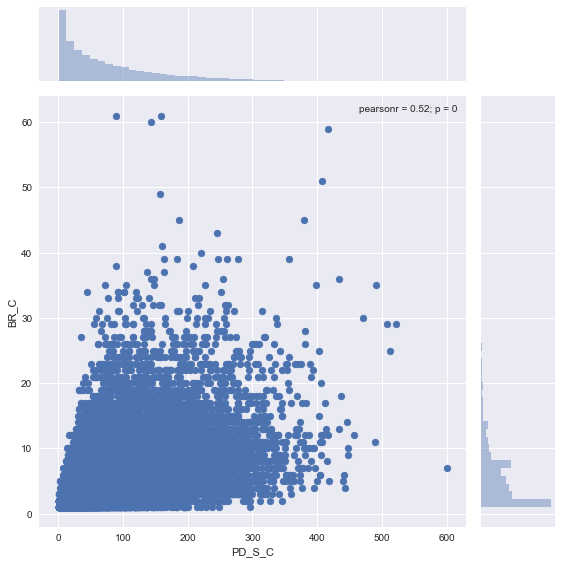

In [45]:
plt.show()

In [46]:
grp= sns.boxplot(x= 'YEARMONTH', y= 'PD_S_C', data= df_restructured, width= 0.3)

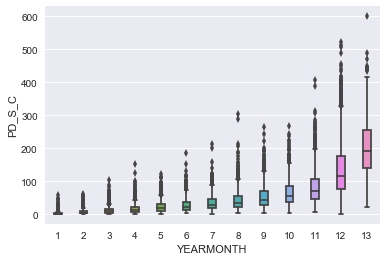

In [47]:
plt.show()

In [48]:
grp= sns.boxplot(x= 'YEARMONTH', y= 'PD_S_C', data= df_restructured, showfliers= False, width= 0.3)

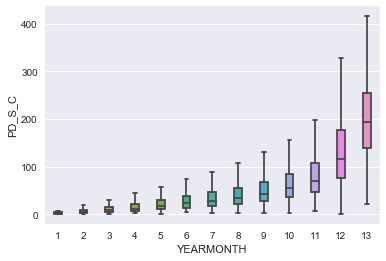

In [49]:
plt.show()

In [50]:
grp= sns.jointplot(df_toplt['PD_S_C'], df_toplt['BUY_AM'], size= 8)

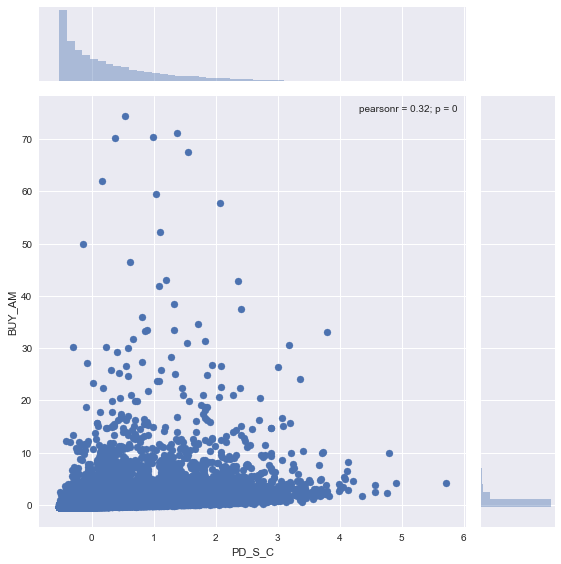

In [51]:
plt.show()

### 소비액을 중심으로 시각화를 진행하였음.

In [52]:
grp= sns.distplot(df_restructured['BUY_AM'], kde= False)

In [53]:
grp.set_xscale('log')

In [54]:
grp.set_yscale('log')

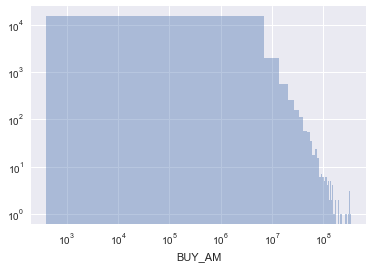

In [55]:
plt.show()
# 소비액의 경우 대부분의 데이터가 소비액 3천만 원 이하 수준에 밀집해 있어 일반적인 방식으로 시각화를 진행하면 눈으로 판별하기 힘들게 됨. 여기서는 x, y축을 log scale로 변환하여 시각화하였음.

In [56]:
grp= sns.boxplot(x= 'BIZ_UNIT', y= 'BUY_AM', data= df_restructured)

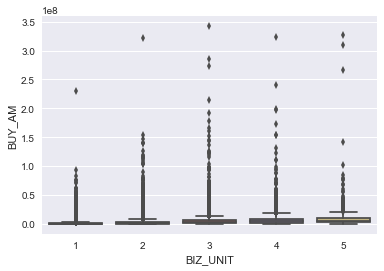

In [57]:
plt.show()

In [58]:
grp= sns.boxplot(x= 'BIZ_UNIT', y= 'BUY_AM', data= df_restructured, showfliers= False)

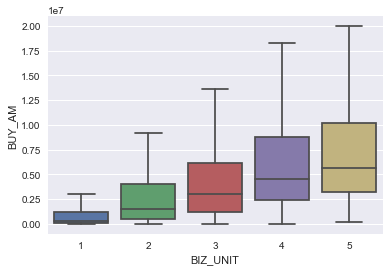

In [59]:
plt.show()

In [60]:
grp= sns.jointplot(df_toplt['BR_C'], df_toplt['BUY_AM'], size= 8)

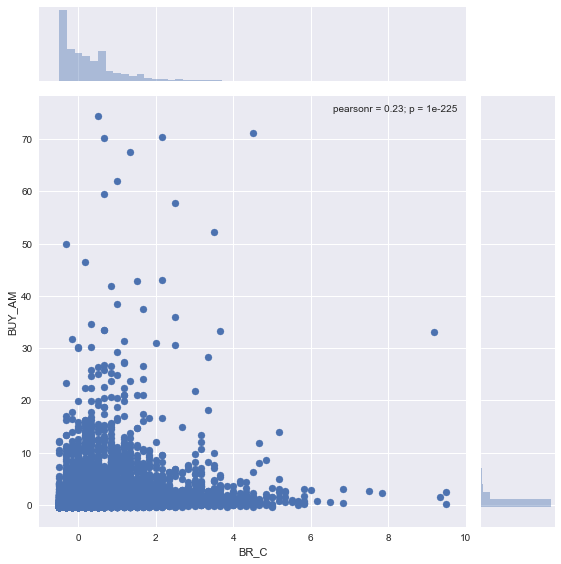

In [61]:
plt.show()

In [62]:
grp= sns.boxplot(x= 'YEARMONTH', y= 'BUY_AM', data= df_restructured)

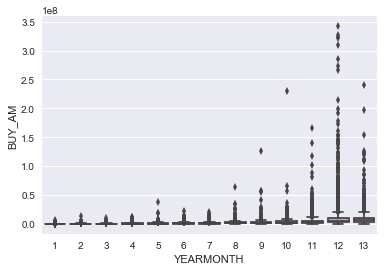

In [63]:
plt.show()

In [64]:
grp= sns.boxplot(x= 'YEARMONTH', y= 'BUY_AM', data= df_restructured, showfliers= False)

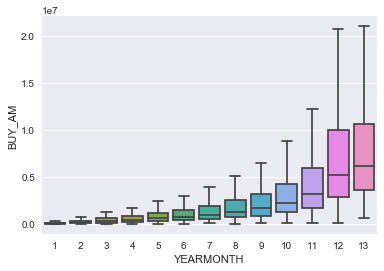

In [65]:
plt.show()

### 사용자를 12개월 이상 사용자와 12개월 미만 사용자로 나누어 분석해 보았음

데이터를 관찰하면서 많은 수의 사용자가 12개월~13개월을 사용한 사용자임을 확인하였음. 이 때 일반적으로 시간이 지나면서 점차 사용자가 줄어드는 것과 달리 12~13개월을 사용한 사용자가 더 많은 이유를 확인하기 위해 두 사용자 그룹을 나누어 분석하였음

In [66]:
df_upper12= df_restructured[df_restructured['YEARMONTH']>=12]

In [67]:
df_lower12= df_restructured[df_restructured['YEARMONTH']<12]

In [68]:
grp= sns.distplot(df_upper12['RCT_NO'], label= 'upper12', bins= 30, kde= False)

In [69]:
grp= sns.distplot(df_lower12['RCT_NO'], label= 'lower12', kde= False)

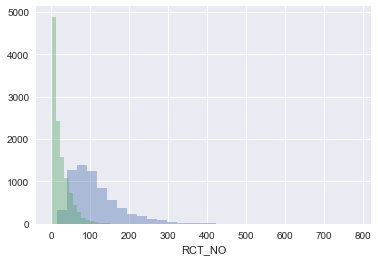

In [70]:
plt.show()

In [71]:
grp= sns.distplot(df_upper12['PD_S_C'], label= 'upper12', bins= 30, kde= False)

In [72]:
grp= sns.distplot(df_lower12['PD_S_C'], label= 'lower12', kde= False)

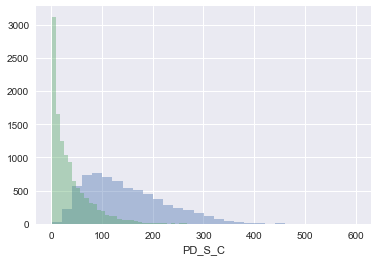

In [73]:
plt.show()

In [74]:
grp= sns.distplot(df_upper12['BR_C'], label= 'upper12', bins= 30, kde= False)

In [75]:
grp= sns.distplot(df_lower12['BR_C'], label= 'lower12', kde= False)

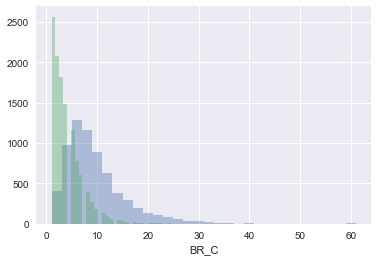

In [76]:
plt.show()

In [77]:
grp= sns.distplot(df_upper12['BUY_AM'], color= 'skyblue', label= 'upper12', bins= newbins, kde= False)

In [78]:
grp= sns.distplot(df_lower12['BUY_AM'], color= 'red', label= 'lower12', kde= False)

In [79]:
grp.set_xscale('log')

In [80]:
grp.set_yscale('log')

In [81]:
plt.legend()

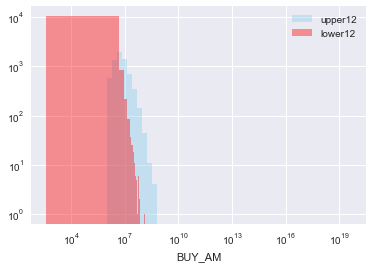

In [82]:
plt.show()
# plt.show()

### 소비액이 20,000,000원 이상인 사용자와 20,000,000원 이하인 사용자를 구분하여 분석하였음.

대부분의 사용자는 20,000,000원 이하를 사용하며 20,000,000원 이상을 사용하는 사용자는 20,000,000원 이하를 사용하는 사용자에 비해 다른 포인트 활용 양상을 가질 것을 가정하였음. 그러나 아래의 그래프에서 2천만 원 이상 사용자의 결제 건수나 소비 소품목 수가 2천만 원 이하 사용자의 특성과 다르지 않음을 확인할 수 있음. 이를 통해 소비 패턴을 분석함에 있어 소비액과 무관한 정보가 존재할 것을 가정하였음.

In [83]:
df_upper3= df_restructured[df_restructured['BUY_AM']>20000000]

In [84]:
df_lower3= df_restructured[df_restructured['BUY_AM']<20000000]

In [85]:
grp= sns.distplot(df_upper3['RCT_NO'], label= 'upper20m', bins= 30, kde= False)

In [86]:
grp= sns.distplot(df_upper3['RCT_NO'], label= 'lower20m', kde= False)

In [87]:
plt.legend()

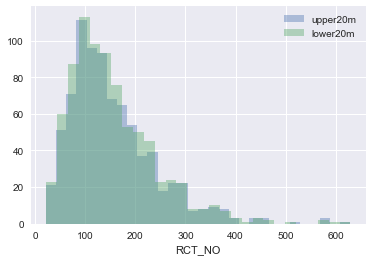

In [88]:
plt.show()

In [89]:
grp= sns.distplot(df_upper3['PD_S_C'], label= 'upper20m', bins= 30, kde= False)

In [90]:
grp= sns.distplot(df_upper3['PD_S_C'], label= 'lower20m', kde= False)

In [91]:
plt.legend()

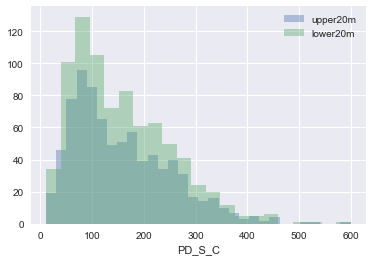

In [92]:
plt.show()

In [93]:
grp= sns.jointplot(df_upper3['PD_S_C'], df_upper3['YEARMONTH'])

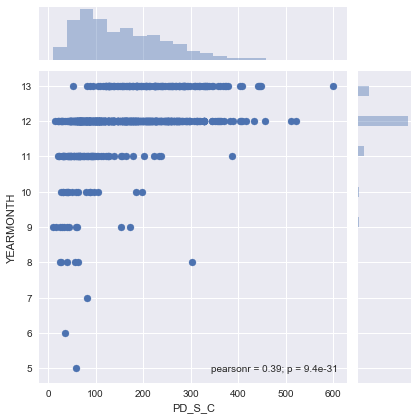

In [94]:
plt.show()

In [95]:
grp= sns.jointplot(df_lower3['PD_S_C'], df_lower3['YEARMONTH'])

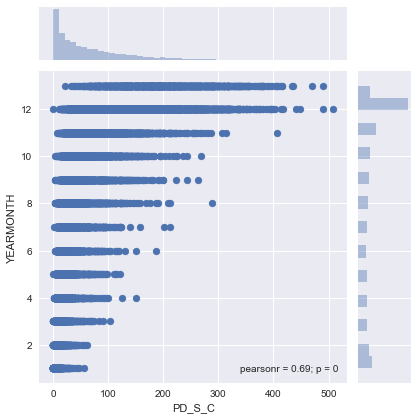

In [96]:
plt.show()